In [3]:
import cv2 as cv
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image
import PIL.ImageOps
import os, ssl, time
import keyboard
from IPython.display import clear_output

In [5]:
x,y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [6]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
nClasses = len(classes)

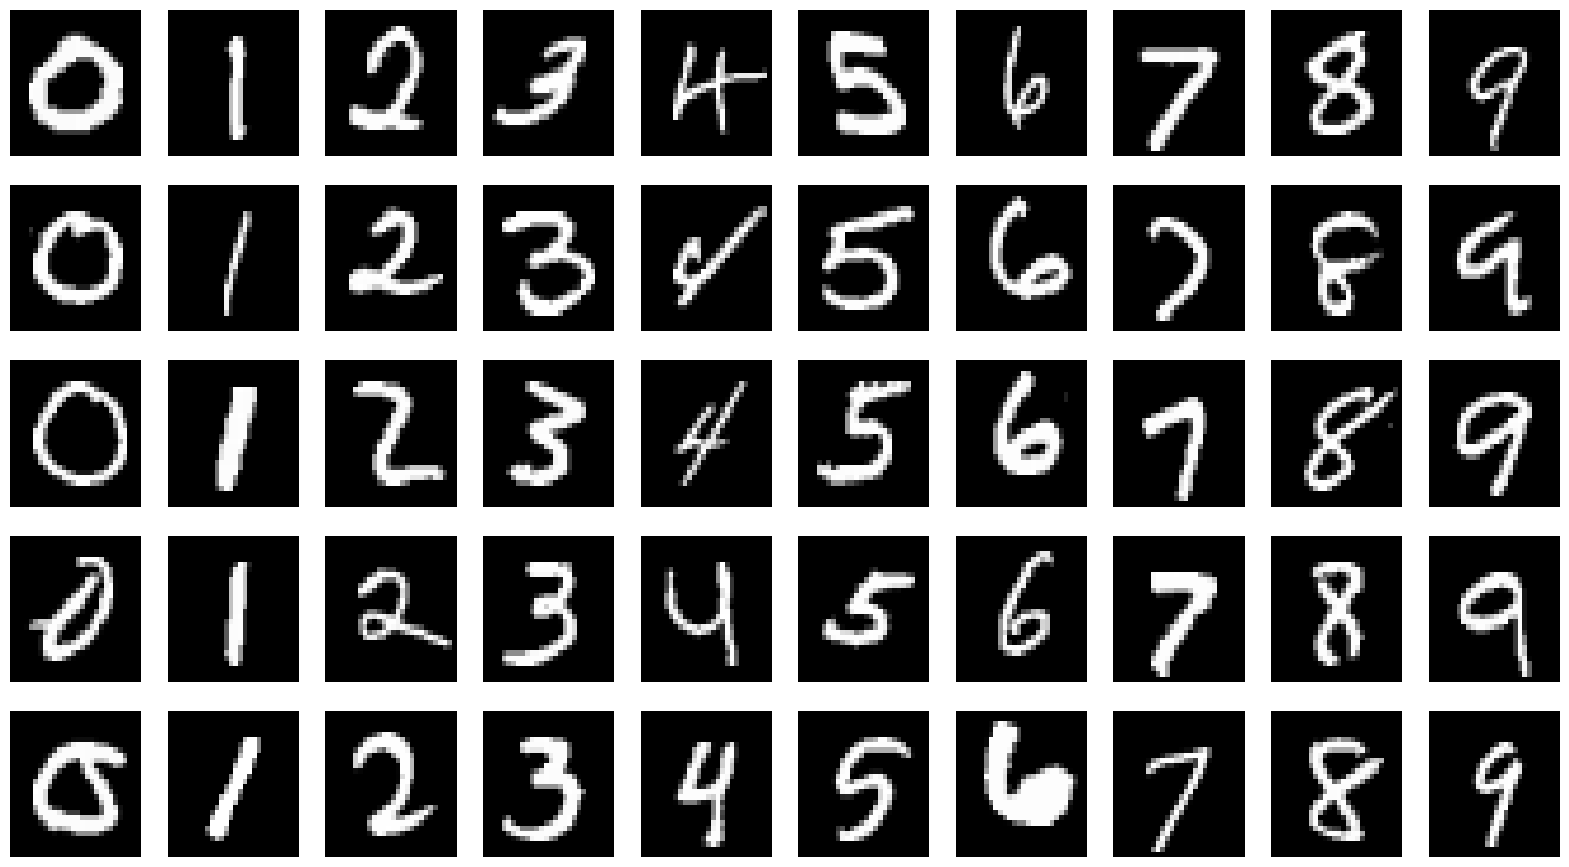

In [6]:
spc = 5
fig = plt.figure(figsize=(nClasses * 2, (1 + spc * 2)))
idx_cls = 0

for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs, spc, replace=False)
  i = 0
  for idx in idxs:
    plt_idx = i * nClasses + idx_cls + 1
    p = plt.subplot(spc, nClasses, plt_idx)
    p = sns.heatmap(np.array(x.loc[idx]).reshape(28, 28), cmap = plt.cm.gray, xticklabels = False, yticklabels = False, cbar = False)
    pltt = plt.axis('Off')
    i += 1
  idx_cls += 1

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 9, train_size= 7500, test_size = 2500)
xtrainscale = xtrain/255.0
xtestscale = xtest/255.0

In [8]:
LR = LogisticRegression(solver="saga", multi_class="multinomial").fit(xtrainscale, ytrain)

c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
pred = LR.predict(xtestscale)
acc = accuracy_score(ytest, pred)
print("Accuracy:", acc*100, '%')

Accuracy: 90.08 %


In [10]:
VC = cv.VideoCapture(0)

while (True):
    try:
        ret, frame = VC.read()
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        h,w = frame_gray.shape
        uleft = int(w/2-56), int(h/2-56)
        bright = int(w/2+56), int(h/2+56)
        display_frame = cv.rectangle(frame_gray, uleft, bright, (0,255,0), 2)
        roi = frame_gray[uleft[1]:bright[1], uleft[0]:bright[0]]
        #roi = np.flip(roi,1)
        preprocessed_roi = Image.fromarray(roi)
        preprocessed_roi_L = preprocessed_roi.convert('L')
        processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
        fully_processed_roi = PIL.ImageOps.invert(processed_roi)
        pixel_filter = 20
        minpix = np.percentile(fully_processed_roi, pixel_filter)
        maxpix = np.max(fully_processed_roi)
        fully_processed_roi_scaled = np.clip(fully_processed_roi - minpix, 0, 255)
        fully_processed_roi_scaled = np.asarray(fully_processed_roi_scaled)/maxpix

        testSample = np.array(fully_processed_roi_scaled).reshape(1,784)
        test_pred = LR.predict(testSample)
        print(test_pred)

        cv.imshow('Output', display_frame)
        cv.waitkey(1)
        if keyboard.is_pressed('esc') or keyboard.is_pressed('q'):
            break
    except:
        pass

VC.release()
cv.destroyAllWindows()

C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['3']
['3']
['3']
['3']
['3']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['3']
['3']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['7']
['7']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['2']
['2']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']


c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Pytho

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['3']
['3']
['3']
['3']
['3']
['3']
['3']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['3']
['7']
['3']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['7']
['3']
['3']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['7']
['7']
['7']
['7']
['7']
['2']
['3']
['2']
['2']
['2']
['2']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['2']
['2']
['2']
['2']
['2']
['2']
['2']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['2']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['7']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['5']
['7']
['5']
['7']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['7']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['5']
['5']
['5']
['5']
['5']
['5']
['5']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']
['7']
['7']


C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3437713297.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  processed_roi = preprocessed_roi_L.resize((28, 28), Image.ANTIALIAS)
c:\Users\91842\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\91842\AppData\Local\Temp\ipykernel_9140\3

['7']
['7']
['7']
['7']
['7']
['7']


: 

: 